## Exploring the weather dataset
#### Plotting the temperature
In this exercise, you'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a box plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read 'weather.csv' into a DataFrame named 'weather'
weather  = pd.read_csv("weather.TXT")
weather


,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nice job! The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


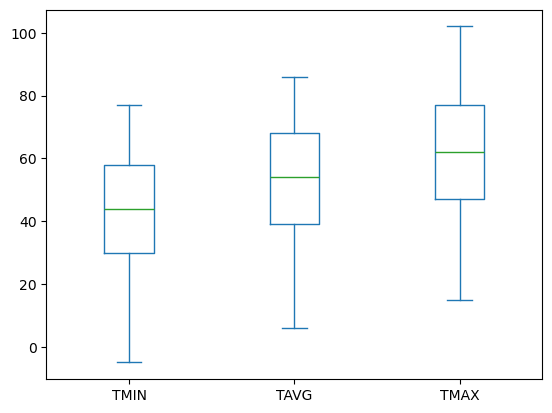

In [3]:
# Describe the temperature columns
print(weather[["TMIN","TAVG","TMAX"]].describe())

# Create a box plot of the temperature columns
weather[["TMIN","TAVG","TMAX"]].plot(kind='box')

# Display the plot
plt.show()

#### Plotting the temperature difference
In this exercise, you'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


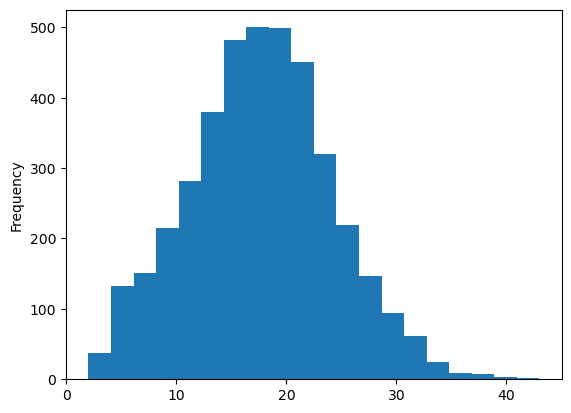

In [4]:
# Create a 'TDIFF' column that represents temperature difference
weather["TDIFF"] = weather['TMAX'] - weather['TMIN']

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind = "hist", bins = 20)

# Display the plot
plt.show()

Great work! The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

## Categorizing the weather
#### Counting bad weather conditions
The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:<br>
<br>
WT05 indicates "Hail"<br>
WT11 indicates "High or damaging winds"<br>
WT17 indicates "Freezing rain"<br>
For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).<br>
<br>
In this exercise, you'll quantify "how bad" the weather was each day by counting the number of 1 values in each row.

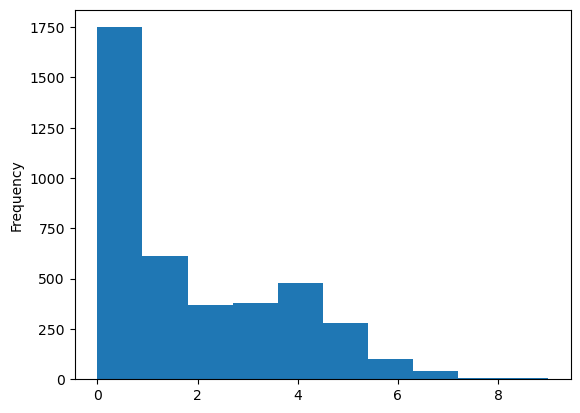

In [30]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis = 'columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind = 'hist')

# Display the plot
plt.show()

Excellent work! It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

#### Rating the weather conditions
In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.<br>
<br>
The counts range from 0 to 9, and should be converted to ratings as follows:<br>
<br>
Convert 0 to 'good'<br>
Convert 1 through 4 to 'bad'<br>
Convert 5 through 9 to 'worse'

In [6]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index(),"\n")

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

bad_conditions
0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: count, dtype: int64 

rating
bad      1836
good     1749
worse     432
Name: count, dtype: int64


Nice job! This rating system should make the weather condition data easier to understand.

#### Changing the data type to category
Since the rating column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

In [31]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good','bad','worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
print(weather.rating.head(),"\n\n")
print(weather)

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse'] 


          STATION        DATE  TAVG  TMIN  TMAX   AWND  WSF2  WT01  WT02  \
0     USW00014765  2005-01-01  44.0    35    53   8.95  25.1   1.0   NaN   
1     USW00014765  2005-01-02  36.0    28    44   9.40  14.1   NaN   NaN   
2     USW00014765  2005-01-03  49.0    44    53   6.93  17.0   1.0   NaN   
3     USW00014765  2005-01-04  42.0    39    45   6.93  16.1   1.0   NaN   
4     USW00014765  2005-01-05  36.0    28    43   7.83  17.0   1.0   NaN   
...           ...         ...   ...   ...   ...    ...   ...   ...   ...   
4012  USW00014765  2015-12-27  51.0    44    61   9.17  28.0   1.0   NaN   
4013  USW00014765  2015-12-28  40.0    30    44  12.30  23.0   NaN   NaN   
4014  USW00014765  2015-12-29  33.0    28    40  12.53  18.1   1.0   NaN   
4015  USW00014765  2015-12-30  30.0    27    35   6.93  15.0   1.0   NaN   
4016  USW00014765  2015-12-31  39.0

Excellent! You'll use the rating column in future exercises to analyze the effects of weather on police behavior.

## Merging datasets
#### Preparing the DataFrames
In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:<br>
<br>
1-With the ri DataFrame, you'll move the stop_datetime index to a column since the index will be lost during the merge.<br>
2-With the weather DataFrame, you'll select the DATE and rating columns and put them in a new DataFrame.

In [8]:
# First, we need to arrange data as previous chapter's version 
# because DataCamp updates tasks depending on the updated data.
# Then, we will proceed merging operations in this chapter.
ri = pd.read_csv("police.TXT")
ri["stop_datetime"] = ri.stop_date.str.cat(ri.stop_time, sep = ' ')
ri.set_index("stop_datetime", inplace = True)
print(ri.stop_duration.unique())
mapping = {'0-15 Min' : 0, '16-30 Min' : 8, '30+ Min' : 23}
ri['stop_minutes'] = ri.stop_duration.map(mapping)
ri


['0-15 Min' '16-30 Min' nan '30+ Min']


,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_minutes
stop_datetime,,,,,,,,,,,,,,,,
2005-01-04 12:55,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,0.0
2005-01-23 23:15,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,0.0
2005-02-17 04:15,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,0.0
2005-02-20 17:15,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,8.0
2005-02-24 01:20,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-23 01:02,RI,2015-02-23,01:02,NaN,F,White,Seatbelt Violation,Seat belt,False,NaN,Citation,False,0-15 Min,False,Zone K3,0.0
2015-02-23 08:37,RI,2015-02-23,08:37,NaN,F,Hispanic,Seatbelt Violation,Seat belt,True,Probable Cause,Citation,False,30+ Min,False,Zone X4,23.0
2015-02-23 10:09,RI,2015-02-23,10:09,NaN,F,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,Zone X3,0.0


In [9]:
# Reset the index of 'ri'
ri.reset_index(inplace = True)

# Examine the head of 'ri'
print(ri.head(), "\n\n")

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating)

      stop_datetime state   stop_date stop_time  county_name driver_gender  \
0  2005-01-04 12:55    RI  2005-01-04     12:55          NaN             M   
1  2005-01-23 23:15    RI  2005-01-23     23:15          NaN             M   
2  2005-02-17 04:15    RI  2005-02-17     04:15          NaN             M   
3  2005-02-20 17:15    RI  2005-02-20     17:15          NaN             M   
4  2005-02-24 01:20    RI  2005-02-24     01:20          NaN             F   

  driver_race                   violation_raw  violation  search_conducted  \
0       White  Equipment/Inspection Violation  Equipment             False   
1       White                        Speeding   Speeding             False   
2       White                        Speeding   Speeding             False   
3       White                Call for Service      Other             False   
4       White                        Speeding   Speeding             False   

  search_type   stop_outcome is_arrested stop_duration  drugs_

Great work! The ri and weather_rating DataFrames are now ready to be merged.

#### Merging the DataFrames
In this exercise, you'll merge the ri and weather_rating DataFrames into a new DataFrame, ri_weather.

The DataFrames will be joined using the stop_date column from ri and the DATE column from weather_rating. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set stop_datetime as the index, which is the column you saved in the previous exercise.

In [10]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(84495, 17)
(84495, 19)


In [11]:
ri_weather

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,
2005-01-04 12:55,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,0.0,2005-01-04,bad
2005-01-23 23:15,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,0.0,2005-01-23,worse
2005-02-17 04:15,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,0.0,2005-02-17,good
2005-02-20 17:15,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,8.0,2005-02-20,bad
2005-02-24 01:20,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,0.0,2005-02-24,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-23 01:02,RI,2015-02-23,01:02,NaN,F,White,Seatbelt Violation,Seat belt,False,NaN,Citation,False,0-15 Min,False,Zone K3,0.0,2015-02-23,bad
2015-02-23 08:37,RI,2015-02-23,08:37,NaN,F,Hispanic,Seatbelt Violation,Seat belt,True,Probable Cause,Citation,False,30+ Min,False,Zone X4,23.0,2015-02-23,bad
2015-02-23 10:09,RI,2015-02-23,10:09,NaN,F,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,Zone X3,0.0,2015-02-23,bad


Fantastic! In the next section, you'll use ri_weather to analyze the relationship between weather conditions and police behavior.

## Does weather affect the arrest rate?

#### Comparing arrest rates by weather rating
Do police officers arrest drivers more often when the weather is bad? Let's find out!
<br>
First, you'll calculate the overall arrest rate.<br>
Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.<br>
Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.<br>
Since you previously defined a logical order for the weather categories, good < bad < worse, they will be sorted that way in the results.<br>

In [12]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean()) #sum(true booleans) /sum(all booleans)

0.036142004398366324


In [13]:
# Calculate the arrest rate for each 'rating'
#print(ri_weather.groupby('rating').is_arrested.mean())
ri_weather['is_arrested'] = ri_weather.is_arrested.astype(float)
print(ri_weather['is_arrested'],"\n\n")
print(ri_weather.groupby('rating').is_arrested.mean())

stop_datetime
2005-01-04 12:55    0.0
2005-01-23 23:15    0.0
2005-02-17 04:15    0.0
2005-02-20 17:15    1.0
2005-02-24 01:20    0.0
                   ... 
2015-02-23 01:02    0.0
2015-02-23 08:37    0.0
2015-02-23 10:09    0.0
2015-02-23 12:35    0.0
2015-02-23 12:56    0.0
Name: is_arrested, Length: 84495, dtype: float64 


rating
good     0.033863
bad      0.037240
worse    0.041667
Name: is_arrested, dtype: float64


/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_11312/609867533.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(ri_weather.groupby('rating').is_arrested.mean())


In [14]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation','rating']).is_arrested.mean())

violation            rating
Equipment            good      0.062611
                     bad       0.069494
                     worse     0.097357
Moving violation     good      0.055364
                     bad       0.059980
                     worse     0.065860
Other                good      0.075046
                     bad       0.088559
                     worse     0.062893
Registration/plates  good      0.090785
                     bad       0.106638
                     worse     0.115625
Seat belt            good      0.030804
                     bad       0.023481
                     worse     0.000000
Speeding             good      0.013288
                     bad       0.013695
                     worse     0.016886
Name: is_arrested, dtype: float64


/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_11312/1536228953.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(ri_weather.groupby(['violation','rating']).is_arrested.mean())


Wow! The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

#### Selecting from a multi-indexed Series
The output of a single .groupby() operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

The outer index level is like the DataFrame rows.
The inner index level is like the DataFrame columns.
In this exercise, you'll practice accessing data from a multi-indexed Series using the .loc[] accessor.

In [32]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate,"\n") 

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'],"\n\n")

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding', 'good':'worse'],"\n\n") # or print(arrest_rate.loc['Speeding'])

print(type(arrest_rate))

violation            rating
Equipment            good      0.062611
                     bad       0.069494
                     worse     0.097357
Moving violation     good      0.055364
                     bad       0.059980
                     worse     0.065860
Other                good      0.075046
                     bad       0.088559
                     worse     0.062893
Registration/plates  good      0.090785
                     bad       0.106638
                     worse     0.115625
Seat belt            good      0.030804
                     bad       0.023481
                     worse     0.000000
Speeding             good      0.013288
                     bad       0.013695
                     worse     0.016886
Name: is_arrested, dtype: float64 

0.059979618576211965 


violation  rating
Speeding   good      0.013288
           bad       0.013695
           worse     0.016886
Name: is_arrested, dtype: float64 


<class 'pandas.core.series.Series'>


/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_11312/329686901.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()


#### Reshaping the arrest rate data
In this exercise, you'll start by reshaping the arrest_rate Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods.

Then, you'll create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!

In [16]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack(),"\n\n")
data_type1 = type(arrest_rate.unstack())
print(data_type1)

rating                   good       bad     worse
violation                                        
Equipment            0.062611  0.069494  0.097357
Moving violation     0.055364  0.059980  0.065860
Other                0.075046  0.088559  0.062893
Registration/plates  0.090785  0.106638  0.115625
Seat belt            0.030804  0.023481  0.000000
Speeding             0.013288  0.013695  0.016886 


<class 'pandas.core.frame.DataFrame'>


In [17]:
# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'),"\n\n")
data_type2 = type(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))
print(data_type2)

rating                   good       bad     worse
violation                                        
Equipment            0.062611  0.069494  0.097357
Moving violation     0.055364  0.059980  0.065860
Other                0.075046  0.088559  0.062893
Registration/plates  0.090785  0.106638  0.115625
Seat belt            0.030804  0.023481  0.000000
Speeding             0.013288  0.013695  0.016886 


<class 'pandas.core.frame.DataFrame'>


Excellent work! In the future, when you need to create a DataFrame like this, you can choose whichever method makes the most sense to you.